## Class 20 (Pre and Post) Animation
Written by Andrea N Lommen in 2020 and edited in 2021 and 2022 and edited by Rachel Langgin July 2024 \\
Haverford College and University of Nevada, Las Vegas \\
Some of the material is from here: http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In [1]:
## Imports with a few new libraries you haven't seen before
import numpy as np
# import SDutils
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc # Useful for control linestyles and plot markers
%matplotlib inline
from IPython.display import HTML
rc('animation', html='html5')

import matplotlib.animation as animation
print(animation.writers.list())

['pillow', 'ffmpeg', 'ffmpeg_file', 'html']


### First let's create a function, and test it
### Also since you're getting used to object-based programming, we're going to create a plot object that we'll modify


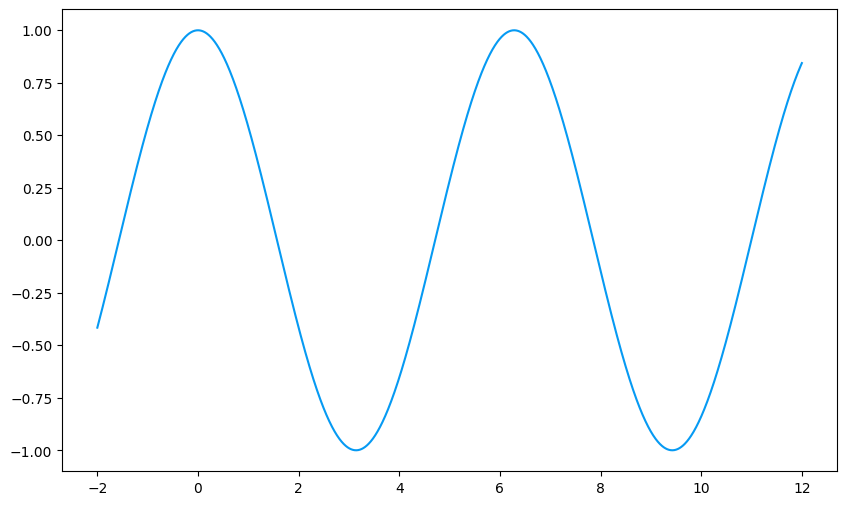

In [2]:
#First define and plot our function
# the following is a wave traveling at velocity v in the +x direction
v=1/4  # The velocity of the wave
def f(x,t):
    y = np.cos(x - v*t)
    return y

fig, ax = plt.subplots(1, 1, figsize=(10, 6)) # This returns a figure object and
# an axis object
xvals = np.linspace(-2, 12, 2000)
ax.plot(xvals, [f(x,0) for x in xvals], color='xkcd:azure') # That's fancy!  There's a
# loop as the second argument!!!
# ax = SDutils.plotparams(ax)
# Notice I set "time" equal to zero in my function

In [3]:
# This fancy line in the cell above
# [f(x,0) for x in xvals]
# I claim that's equivalent to:
y=[] # empty list
for x in xvals:
    y.append(f(x,0))

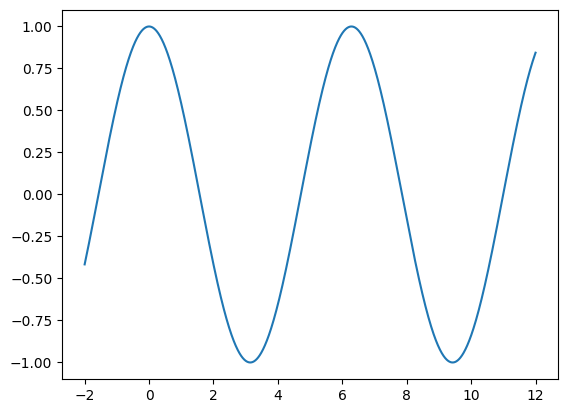

In [4]:
plt.plot(xvals, y)

In [5]:
number_of_frames=100  # Number of frames in the animation
fig, ax = plt.subplots(1, 1, figsize=(10, 6));  # creating figures and axis objects
# ax = SDutils.plotparams(ax);
ax.set_xlim(-2, 12);   # Notice you can use axis methods set_xlim and xet_ylim to modify the axis now
ax.set_ylim(-1, 7);
# Create a plot with nothing in it - just defining line styles and markers
line, = ax.plot([], [], lw=3, ls='-', color='xkcd:violet', marker='o'); # plot
# returns two arguments which we haven't been keeping before, but now we're
# keeping the first one, a 'line' object

# Create the yvalues that we'll animate.  This one line creates 100 plots, each of
# which will be plotting in succession.  If you're interested in how this works, I
# created a little tutorial at the bottom of this workbook.
# It's a double loop!!!
yvals = [ [ f(x,t) for x in xvals ] for t in np.linspace(-4, 10, number_of_frames) ]
# This is equivalent to saying "For each time in my time array, I want you to
# calculate what all the y-values are at that time.

def animate(i):  # Define an animation function that returns a "line" object that
    # represents one frame of the movie
    x = xvals
    y = yvals[i]  # This is an array of values
    line.set_data(x,y)
    return line,

def init():   #  Initializing function - it'll look like this every time, so I'm
    # not going to talk about this.  Just use it just like this!
    line.set_data([],[])
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=number_of_frames, interval=50, blit=True, save_count=0);
"""Notice what you're passing it:
The figure object you created above.
The animate function you created above
The initializing function you created above
The number of frames
The interval (how long does it wait after showing a frame)
blit, and save_count, both of which you can look up (matplotlib.FuncAnimation) but I
would just leave them for now.
"""
plt.close()


<ipython-input-5-ab4d232ef60b>:31: UserWarning: You passed in an explicit save_count=0 which is being ignored in favor of frames=100.
  anim = FuncAnimation(fig, animate, init_func=init, frames=number_of_frames, interval=50, blit=True, save_count=0);


In [6]:
HTML(anim.to_html5_video())

## First mini-exercise
Change the following things about the animation.  In all cases this requires changing just one number in the code above.  I'm having you do this list of things to get you used to all the moving parts in the code.

* Make the movie last longer by adding more frames.
* Make the movie last longer by making each frame take longer.
* The sine wave goes up to 1, but my y-axis goes up to 7.  Change the plot y-axis so that is goes from -1 to 1.
* Change the color of the plot.

# Making your own animation
All you really need is a series of images.  Let me disect that double-loop structure for you a little bit so you can see what I mean.

In [7]:
# Let's look at this double loop structure we used above:
# yvals = [ [ f(x,t) for x in xvals ] for t in np.linspace(-4, 10, number_of_frames) ]

# I claim this is equivalent to:
yvals = []  # Creating an empty list
for t in np.linspace(-4, 10, number_of_frames):   # For each frame
    yvals.append(f(xvals, t))   # Calculate what the curve should look like

# So now each yvals[i] represents one set of y-values

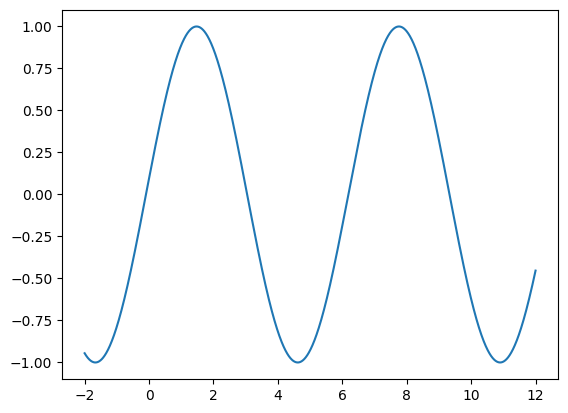

In [8]:
# Let me prove it to you
# You can put any number you want in the following line, and it'll
# plot that frame of the movie.
plt.plot(xvals, yvals[70])

In [9]:
# Let's make sure I can animate it the same way:
def animate(i):  # Define an animation function that returns a "line" object that
    # represents one frame of the movie
    x = xvals
    y = yvals[i]
    line.set_data(x,y)
    return line,

def init():   #  Initializing function - it'll look like this every time, so I'm
    # not going to talk about this.  Just use it just like this!
    line.set_data([],[])
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=number_of_frames,
                     interval=10, blit=True, save_count=0);

<ipython-input-9-4d509fb81c11>:14: UserWarning: You passed in an explicit save_count=0 which is being ignored in favor of frames=100.
  anim = FuncAnimation(fig, animate, init_func=init, frames=number_of_frames,


In [10]:
HTML(anim.to_html5_video())

<ipython-input-11-2f20a7b2496f>:51: UserWarning: You passed in an explicit save_count=0 which is being ignored in favor of frames=1000.
  anim = FuncAnimation(fig, animate, init_func=init, frames=number_of_frames,


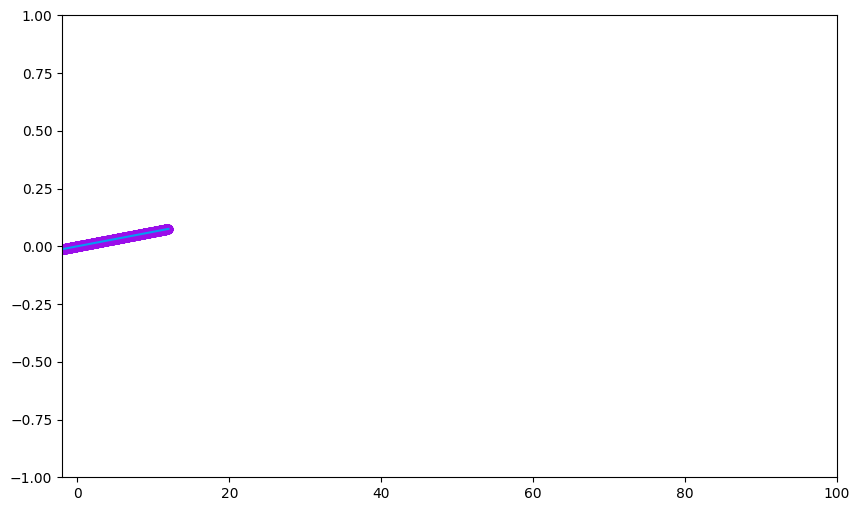

In [11]:
# The fundamental pieces of the animation:

# Step 1: Define the function you want to animate, for example
v=1/4  # The velocity of the wave
def f(x,t):
    lamda = 1000 # how long is the wavelength it starts out with
    period = 1000 # how much time for it to repeat
    y = np.sin(2*np.pi*x/(lamda*np.cos(2*np.pi*t/period)))
    # I want the sine wave in the denominator to go back and forth between -1 and 1
    # about every 1000 frames
    # And I want the x-axis to only show a fraction (1/8) of the sine wave at most
    # and like 1/100th at smallest.  It should start out at 100th and go to an 8th, then
    # go back to 100 and switch signes.  So the period is 100*2pi at first, and goes
    # to 0, and then goes backward.
    return y

# Step 2: Set up the plot, its limits, the xvalues you'll use,
# and test your function without animating it
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# This returns a figure object and
# an axis object
ax.set_xlim(-2, 100);   # Notice you can use axis "methods" to modify the axis now
ax.set_ylim(-1, 1);
# Create a plot with nothing in it - just defining line styles and markers
line, = ax.plot([], [], lw=3, ls='-', color='xkcd:violet', marker='o'); # plot
xvals = np.linspace(-2, 12, 2000)
ax.plot(xvals, [f(x,0) for x in xvals], color='xkcd:azure')
# That second argument is a loop in place of the y-values!


# Step 3: Create the series of plots yvals[i] that you want to plot
number_of_frames=1000
yvals = [ [ f(x,t) for x in xvals ] for t in np.linspace(-4, 10, number_of_frames) ]


# Step 4: Define the animation function
def animate(i):  # Define an animation function that returns a "line" object that
    # represents one frame of the movie
    x = xvals
    y = yvals[i]
    line.set_data(x,y)
    return line,

# Step 5: Create the initialization function
def init():   #  Initializing function - it'll look like this every time, so I'm
    # not going to talk about this.  Just use it just like this!
    line.set_data([],[])
    return line,

# Step 6: Create the animation
anim = FuncAnimation(fig, animate, init_func=init, frames=number_of_frames,
                     interval=10, blit=True, save_count=0);

# Step 7: Show the movie!
HTML(anim.to_html5_video())

## Second exercise
Create your own animation by changing ONLY steps1 and 2 above.

NOTE: I recommend putting each step in a separate cell.

Some suggestions:
* Instead of the cosine function as I did, you could use an exponential function such as
$$ y = e^{x/(t+10)}$$
You may have to be careful with y getting very large.  Your testing (step 2) should sort that out.
* Your function could add two sine waves together.
* Here's a function that plots a moving square wave: (written by Dom Rowan '20)
     
     def f(x,t):
         x = x-t
         if 2 <= x <= 6:
             return 6
         else:
             return 0

* (This is very likely more than you can do in the 20 minutes I left you, but you may well want to do this for your project) Import a CSV that has a different set of y- values for each of a set of t-values. (For example, the smog (y) in various counties (x) in Los Angeles as a function of time (t).)  Create an animation that shows all the different sets of y-values as an animation.

## Rachel's solution to the 2nd exercise
I recommend putting each step in a separate cell so you can debug.

In [12]:
# Step 1: Define the function you want to animate
def f(x,t):
    y = np.exp(x/(t+10))
    return y

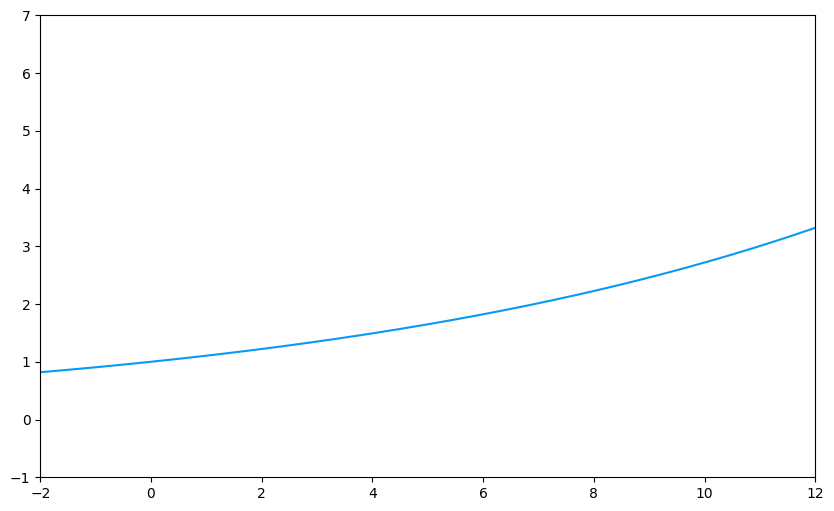

In [13]:
# Step 2: Set up the plot, its limits, the xvalues you'll use,
# and test your function without animating it
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
# This returns a figure object and
# an axis object
ax.set_xlim(-2, 12);   # Notice you can use axis "methods" to modify the axis now
ax.set_ylim(-1, 7);
# Create a plot with nothing in it - just defining line styles and markers
# The following defines what style the animated graph will be in
line, = ax.plot([], [], lw=3, ls='-', color='xkcd:violet', marker='o'); # plot
xvals = np.linspace(-2, 12, 2000)
# The following actually plots the function for t=0 just so I can see it
ax.plot(xvals, [f(x,0) for x in xvals], color='xkcd:azure')
# That second argument is a loop in place of the y-values!


In [14]:
# Step 3: Create the series of plots yvals[i] that you want to plot
number_of_frames=100
yvals = [ [ f(x,t) for x in xvals ] for t in np.linspace(-4, 10, number_of_frames) ]

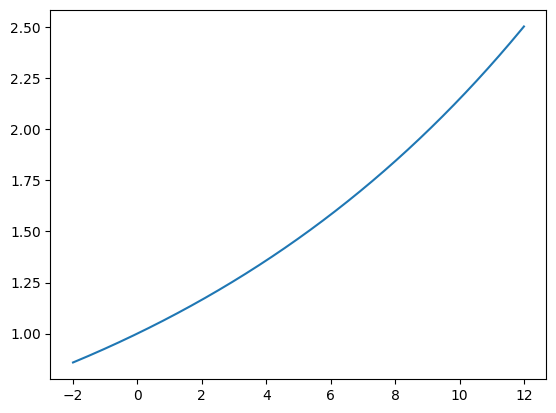

In [15]:
# Doing some testing here
plt.plot(xvals, yvals[50])

In [16]:
# Step 4: Define the animation function
def animate(i):  # Define an animation function that returns a "line" object that
    # represents one frame of the movie
    x = xvals
    y = yvals[i]
    line.set_data(x,y)
    return line,

In [17]:
# Step 5: Create the initialization function
def init():   #  Initializing function - it'll look like this every time, so I'm
    # not going to talk about this.  Just use it just like this!
    line.set_data([],[])
    return line,

In [18]:
# Step 6: Create the animation
anim = FuncAnimation(fig, animate, init_func=init, frames=number_of_frames,
                     interval=10, blit=True, save_count=0);

<ipython-input-18-7c33519a1acb>:2: UserWarning: You passed in an explicit save_count=0 which is being ignored in favor of frames=100.
  anim = FuncAnimation(fig, animate, init_func=init, frames=number_of_frames,


In [19]:
# Step 7: Show the movie!
HTML(anim.to_html5_video())

Yay!  I'm not sure why the azure line reappears.  It must be stored in the "ax" object.  I don't quite understand that part.  If you figure it out let me know!